# <center> **Bharat Intern - Internship**

# Task 1:  Titanic Classification
By Eshank Soni

## About the Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we are building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Objective:
1. Understand the Dataset & cleanup (if required).
2. Build a strong classification model to predict whether the passenger survives or not.

# Data Preparation

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Loading the dataset
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# showing number of rows and columns of dataset
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# checking for columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Information about Columns:**

1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: passenger class
4. Name: name
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton

#  Data Preprocessing and Data Cleaning

In [7]:
# checking for data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Handling Duplicate Values**

In [8]:
# checking for duplicated values
titanic.duplicated().sum()

0

**Handling Null Values**

In [9]:
# checking for null values
nv = titanic.isnull().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

In [10]:
# Since Cabin column has too many null values, hence dropping the cabin column
titanic.drop(['Cabin'], axis = 1, inplace=True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
# Filling Null Values in Age column with mean values of age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [12]:
# filling null values in Embarked Column with mode values of embarked column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [13]:
# Cheking for null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Checking for Unique Values

In [14]:
# Finding no. of uniques values in each column of dataset.
titanic.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

## Dropping Some Unnecessary Columns
There are 3 columns i.e. 'PassengerId' , 'Name' , 'Ticket' are unnecessary columns which have no use in data modelling . So, we will drop these 3 columns

In [15]:
columns_to_drop = ['PassengerId','Name','Ticket']
titanic.drop(columns_to_drop, axis = 1, inplace = True )
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Data Visualization

1. Sex Column

In [16]:
d1 = titanic['Sex'].value_counts()
d1

Sex
male      577
female    314
Name: count, dtype: int64

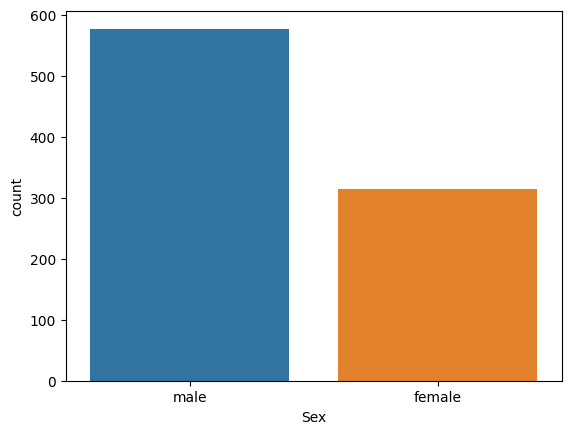

In [17]:
# Plotting Count plot for sex column
sns.countplot(x=titanic['Sex'])
plt.show()

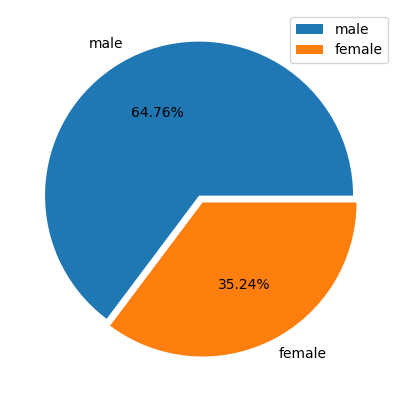

In [18]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%',explode = (0.05,0))
plt.legend()
plt.show()

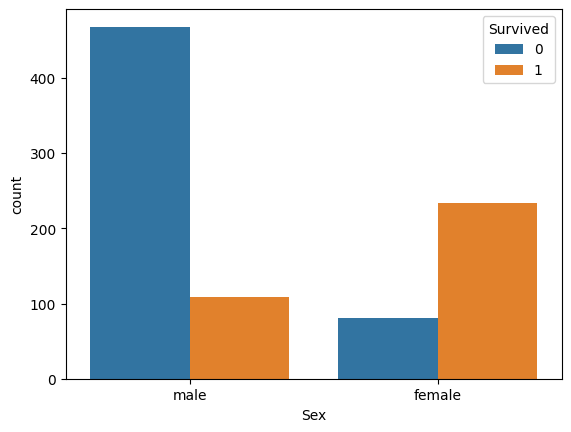

In [19]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=titanic['Sex'],hue=titanic['Survived'])
plt.show()

- This plot clearly shows that number of males died is more than the number of females died

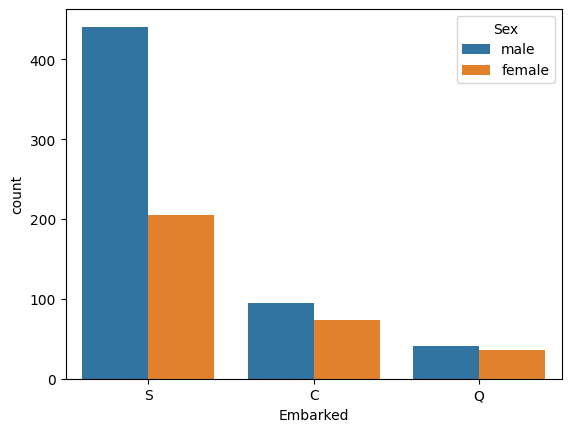

In [20]:
# Showing Distribution of Embarked Sex wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

2. Pclass Column

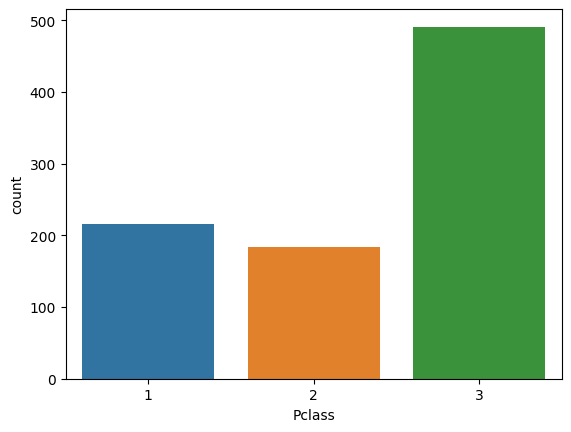

In [21]:
# Plotting CountPlot for Pclass Column
sns.countplot(x=titanic['Pclass'])
plt.show()

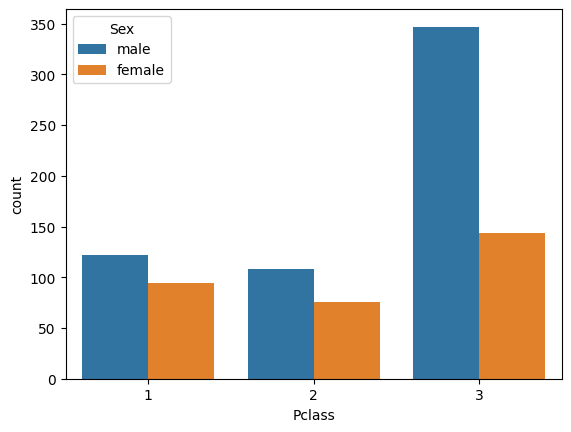

In [22]:
# Showing Distribution of Pclass Sex wise
sns.countplot(x=titanic['Pclass'],hue=titanic['Sex'])
plt.show()

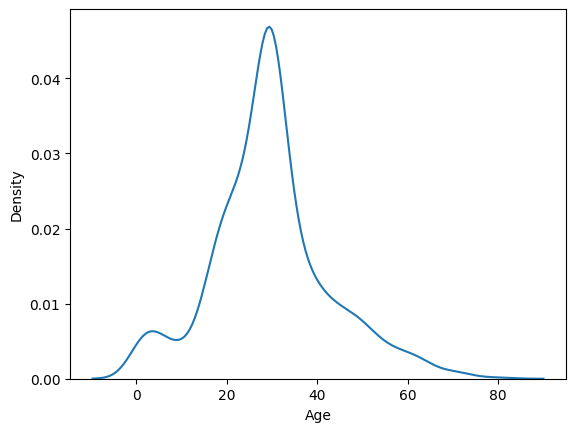

In [23]:
# Age Distribution
sns.kdeplot(x=titanic['Age'])
plt.show()

- From this plot it came to know that most of the people lie between 20-40 age group.

3. Survived Column

Survived
0    549
1    342
Name: count, dtype: int64


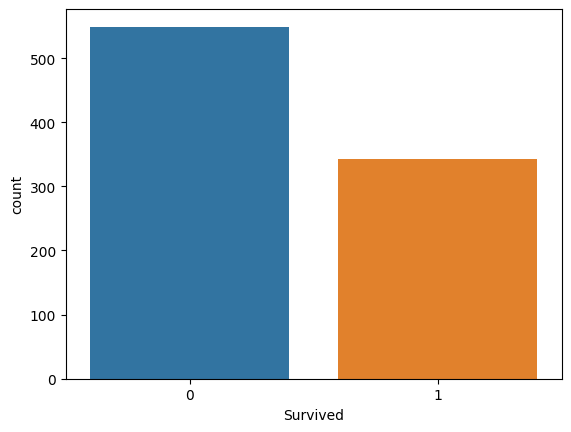

In [24]:
# Plotting CountPlot for Survived Column
print(titanic['Survived'].value_counts())
sns.countplot(x=titanic['Survived'])
plt.show()

- This plot Clearly shows most people are died

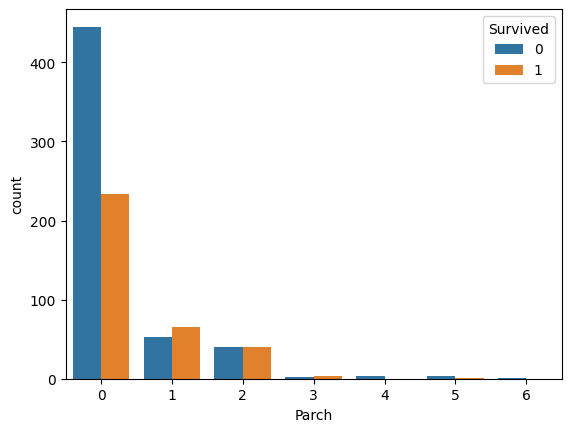

In [25]:
# Showing Distribution of Parch Survived Wise
sns.countplot(x=titanic['Parch'],hue=titanic['Survived'])
plt.show()

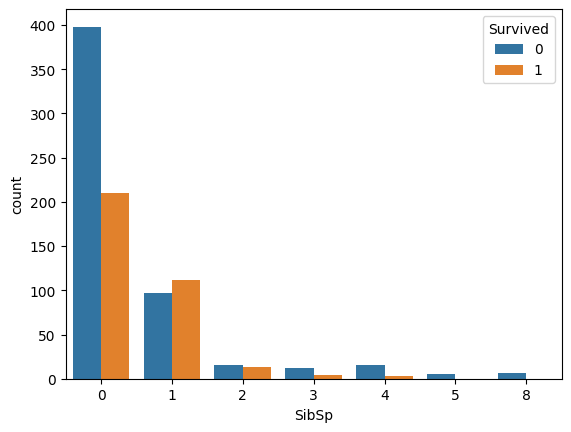

In [26]:
# Showing Distribution of SibSp Survived Wise
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'])
plt.show()

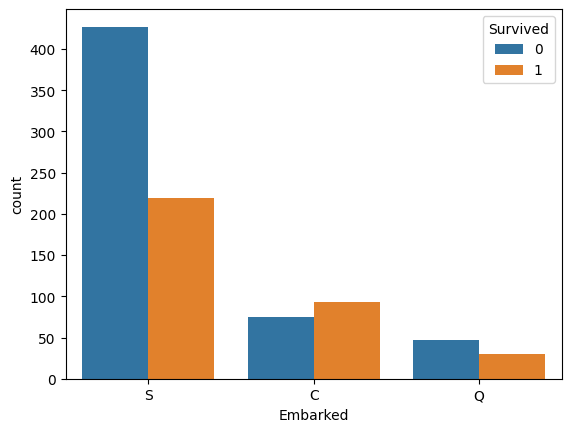

In [27]:
# Showing Distribution of Embarked Survived wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Survived'])
plt.show()

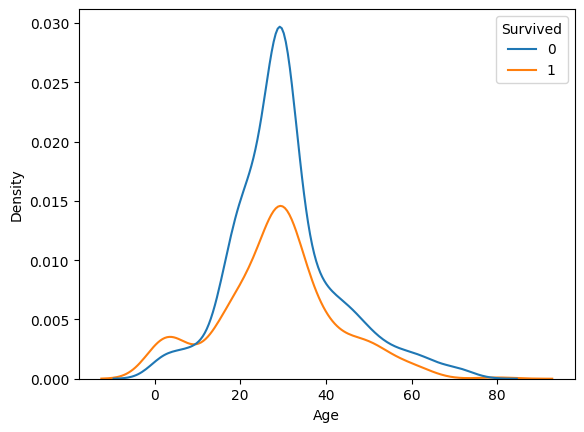

In [28]:
# Showing Distribution of Age Survived Wise
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

- This Plot showing most people of age group of 20-40 are died

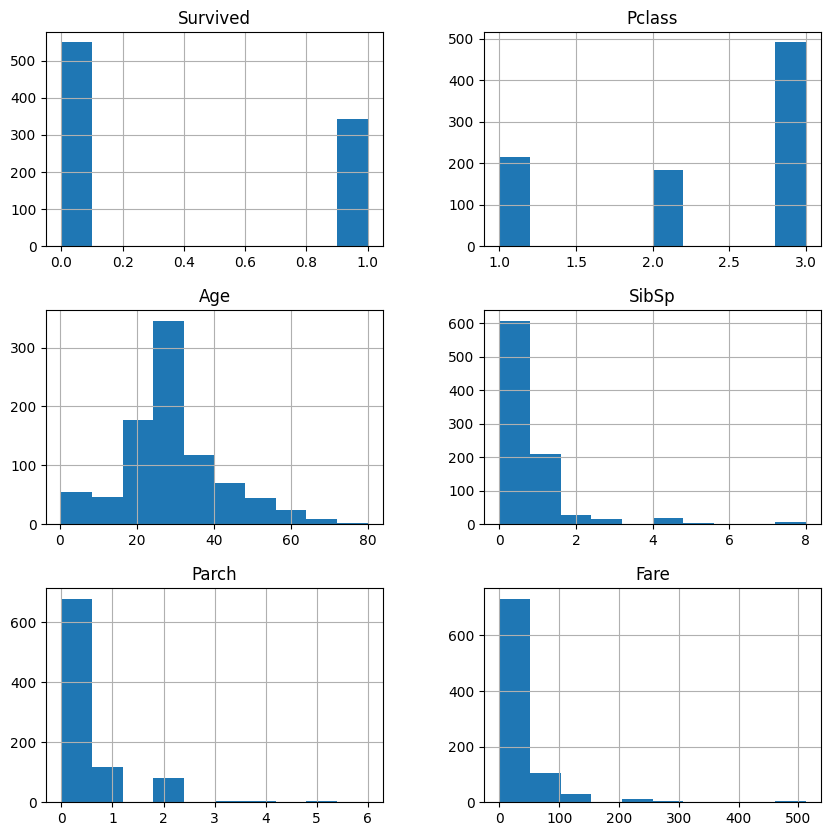

In [29]:
# Plotting Histplot for Dataset
titanic.hist(figsize=(10,10))
plt.show()

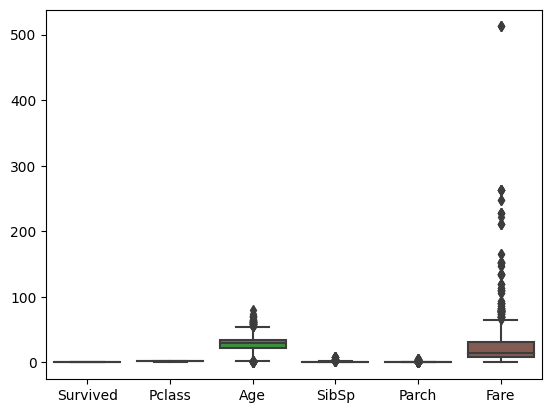

In [30]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic)
plt.show()

- This Plot showing Outliers in 2 columns i.e.. Age and Fare.

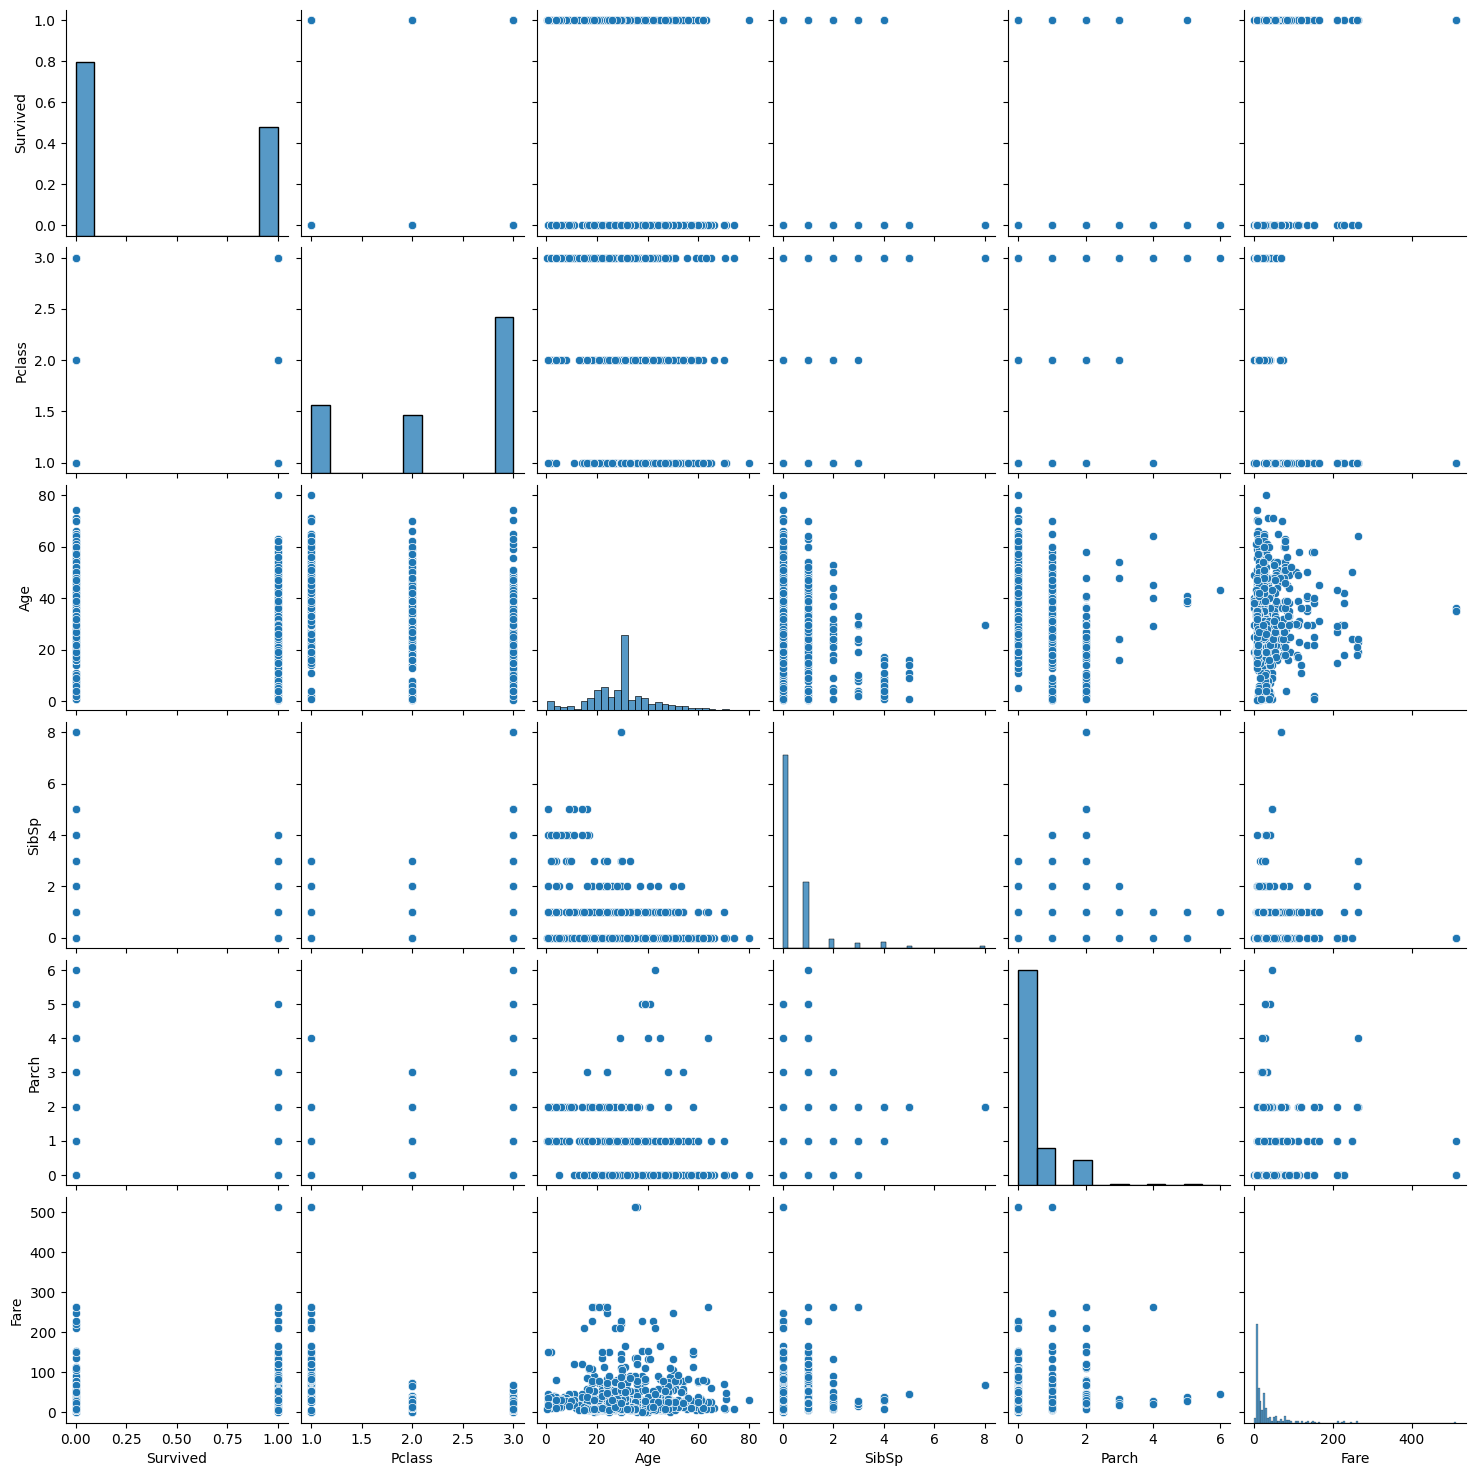

In [31]:
# Plotting pairplot
sns.pairplot(titanic)
plt.show()

# Checking the target variable

In [32]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

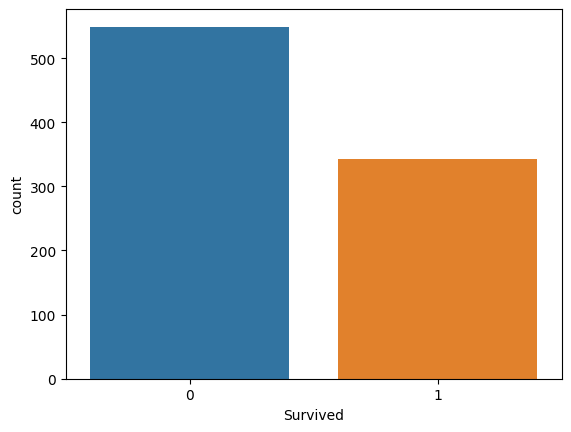

In [33]:
sns.countplot(x=titanic['Survived'])
plt.show()

# Label Encoding

In [34]:
#importing Library
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

#Apply Label encoding to each categorical column
for column in ['Sex', 'Embarked']:
    titanic[column] = le.fit_transform(titanic[column])
titanic.head()

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Data Modelling

# Selecting the Dependent and Indepedent Features

In [35]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [36]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [37]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train_Test_Split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


# Logistic Regression

In [39]:
# Building the Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Generating Prediction
ypred_lr = lr.predict(x_test)

# Evaluate the model Accuracy score
acc_lr = round(accuracy_score(ypred_lr, y_test)* 100, 2)
print('Accuracy Score',round(acc_lr,2), "%")

Accuracy Score 77.78 %


# Decision Tree

In [40]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

# Print score
print('Accuracy Score:',round(acc_decision_tree,2,), "%")

Accuracy Score: 98.25 %


# Random Forest

In [41]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

# Print score
print('Accuracy Score:',round(acc_random_forest,2,), "%")

Accuracy Score: 98.25 %


#  KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

Y_pred = knn.predict(x_test)

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

# Print score
print('Accuracy Score:',round(acc_knn,2,), "%")

Accuracy Score: 84.77 %


# Model Evaluation

In [43]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_lr, 
              acc_random_forest, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
98.25,Random Forest
98.25,Decision Tree
84.77,KNN
77.78,Logistic Regression


# Visualizing the results in a barplot

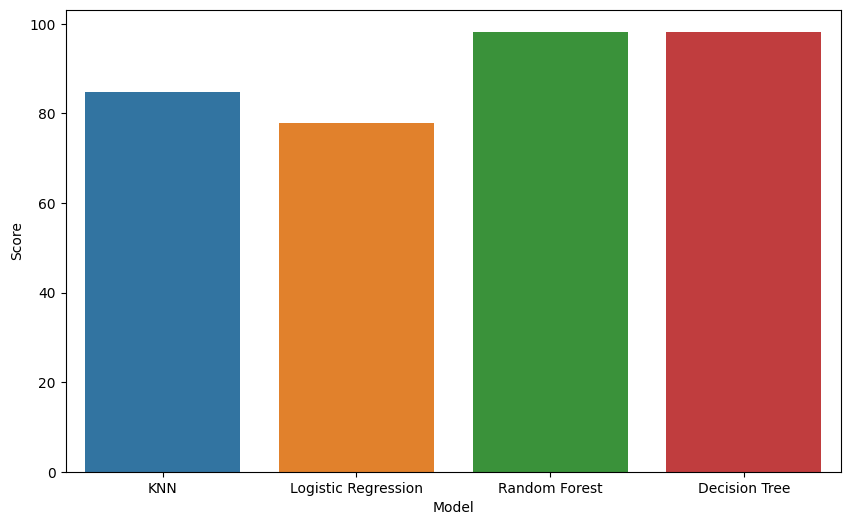

In [44]:
plt.figure(figsize= (10,6))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=results['Model'],y=results['Score'])

plt.show()

The **Random Forest classifier** goes on top of the Machine Learning models, followed by **Decision Tree** and **KNN** respectfully. 